Imports

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np



Overall Human Ratings Correlation

In [4]:
def parse_ratings(rating_str):
    # Convert string representation of ratings to dictionary
    rating_dict = {}
    for line in rating_str.strip().split('\n'):
        if ':' in line:
            key, value = line.split(':')
            try:
                rating_dict[key.strip()] = float(value.strip())
            except ValueError:
                continue
    return rating_dict

# Read the CSV file
df = pd.read_csv('Last100TwoHumans.csv', sep=';')

# Parse ratings
t5_generated = df['T5 Ratings'].apply(parse_ratings)
llama_generated = df['LLaMA Ratings'].apply(parse_ratings)
t5_human1 = df['T5 Human Ratings 1'].apply(parse_ratings)
t5_human2 = df['T5 Human Ratings 2'].apply(parse_ratings)
llama_human1 = df['LLaMA Human Ratings 1'].apply(parse_ratings)
llama_human2 = df['LLaMA Human Ratings 2'].apply(parse_ratings)

# Components to compare
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

# Function to get all ratings as a flat list
def get_all_ratings(ratings1, ratings2):
    all_pairs = []
    for r1, r2 in zip(ratings1, ratings2):
        if r1 and r2:  # if both ratings exist
            for component in components:
                if component in r1 and component in r2:
                    all_pairs.append((r1[component], r2[component]))
    return zip(*all_pairs)

# Calculate overall Kendall's Tau (across all components)
print("Overall Kendall's Tau Correlations (across all components):")
print("-" * 60)

# T5 Human 1 vs Human 2
t5_h1_ratings, t5_h2_ratings = get_all_ratings(t5_human1, t5_human2)
tau_t5_h1_h2, p_value_t5_h1_h2 = stats.kendalltau(t5_h1_ratings, t5_h2_ratings)
print(f"T5 Human 1 vs Human 2:        Tau = {tau_t5_h1_h2:.3f} (p-value: {p_value_t5_h1_h2:.3f})")

# LLaMA Human 1 vs Human 2
llama_h1_ratings, llama_h2_ratings = get_all_ratings(llama_human1, llama_human2)
tau_llama_h1_h2, p_value_llama_h1_h2 = stats.kendalltau(llama_h1_ratings, llama_h2_ratings)
print(f"LLaMA Human 1 vs Human 2:     Tau = {tau_llama_h1_h2:.3f} (p-value: {p_value_llama_h1_h2:.3f})")

# T5 Generated vs Human 1
t5_gen_ratings, t5_h1_ratings = get_all_ratings(t5_generated, t5_human1)
tau_t5_gen_h1, p_value_t5_gen_h1 = stats.kendalltau(t5_gen_ratings, t5_h1_ratings)
print(f"T5 Generated vs Human 1:      Tau = {tau_t5_gen_h1:.3f} (p-value: {p_value_t5_gen_h1:.3f})")

# LLaMA Generated vs Human 1
llama_gen_ratings, llama_h1_ratings = get_all_ratings(llama_generated, llama_human1)
tau_llama_gen_h1, p_value_llama_gen_h1 = stats.kendalltau(llama_gen_ratings, llama_h1_ratings)
print(f"LLaMA Generated vs Human 1:   Tau = {tau_llama_gen_h1:.3f} (p-value: {p_value_llama_gen_h1:.3f})")

Overall Kendall's Tau Correlations (across all components):
------------------------------------------------------------
T5 Human 1 vs Human 2:        Tau = 0.566 (p-value: 0.000)
LLaMA Human 1 vs Human 2:     Tau = 0.664 (p-value: 0.000)
T5 Generated vs Human 1:      Tau = 0.198 (p-value: 0.000)
LLaMA Generated vs Human 1:   Tau = 0.350 (p-value: 0.000)


Specific Human Ratings Correlation


In [5]:
def parse_ratings(rating_str):
    # Convert string representation of ratings to dictionary
    rating_dict = {}
    for line in rating_str.strip().split('\n'):
        if ':' in line:
            key, value = line.split(':')
            try:
                rating_dict[key.strip()] = float(value.strip())
            except ValueError:
                continue
    return rating_dict

# Read the CSV file
df = pd.read_csv('Last100TwoHumans.csv', sep=';')

# Calculate overall Kendall's Tau for T5 and LLaMA Human Ratings
t5_human1 = df['T5 Human Ratings 1']
t5_human2 = df['T5 Human Ratings 2']
tau_t5, p_value_t5 = stats.kendalltau(t5_human1, t5_human2)

llama_human1 = df['LLaMA Human Ratings 1']
llama_human2 = df['LLaMA Human Ratings 2']
tau_llama, p_value_llama = stats.kendalltau(llama_human1, llama_human2)

print(f"Number of rows analyzed: {len(df)}")


# Parse ratings into components
t5_h1_parsed = df['T5 Human Ratings 1'].apply(parse_ratings)
t5_h2_parsed = df['T5 Human Ratings 2'].apply(parse_ratings)
llama_h1_parsed = df['LLaMA Human Ratings 1'].apply(parse_ratings)
llama_h2_parsed = df['LLaMA Human Ratings 2'].apply(parse_ratings)

# Components to compare
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

print("\nT5 Component-wise Correlations:")
for component in components:
    # Get component ratings where both exist
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(t5_h1_parsed, t5_h2_parsed) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        h1_ratings, h2_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(h1_ratings, h2_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")
    else:
        print(f"{component:15} - No valid pairs found")

print("\nLLaMA Component-wise Correlations:")
for component in components:
    # Get component ratings where both exist
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(llama_h1_parsed, llama_h2_parsed) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        h1_ratings, h2_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(h1_ratings, h2_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")
    else:
        print(f"{component:15} - No valid pairs found")

Number of rows analyzed: 100

T5 Component-wise Correlations:
supports        - Kendall's Tau: 1.000 (p-value: 0.000) (n=100)
overall         - Kendall's Tau: 0.259 (p-value: 0.002) (n=100)
well_written    - Kendall's Tau: 0.155 (p-value: 0.123) (n=100)
related         - Kendall's Tau: 0.200 (p-value: 0.047) (n=100)
factual         - Kendall's Tau: 0.095 (p-value: 0.345) (n=100)
new_info        - Kendall's Tau: 0.106 (p-value: 0.285) (n=100)
unnecessary_info - Kendall's Tau: 0.324 (p-value: 0.001) (n=100)
contrastive     - Kendall's Tau: -0.018 (p-value: 0.860) (n=100)

LLaMA Component-wise Correlations:
supports        - Kendall's Tau: 1.000 (p-value: 0.000) (n=100)
overall         - Kendall's Tau: 0.178 (p-value: 0.043) (n=100)
well_written    - Kendall's Tau: 0.039 (p-value: 0.695) (n=100)
related         - Kendall's Tau: 0.091 (p-value: 0.363) (n=100)
factual         - Kendall's Tau: 0.278 (p-value: 0.006) (n=100)
new_info        - Kendall's Tau: 0.224 (p-value: 0.011) (n=100)
unne

Plotting Specific Human Ratings Correlation


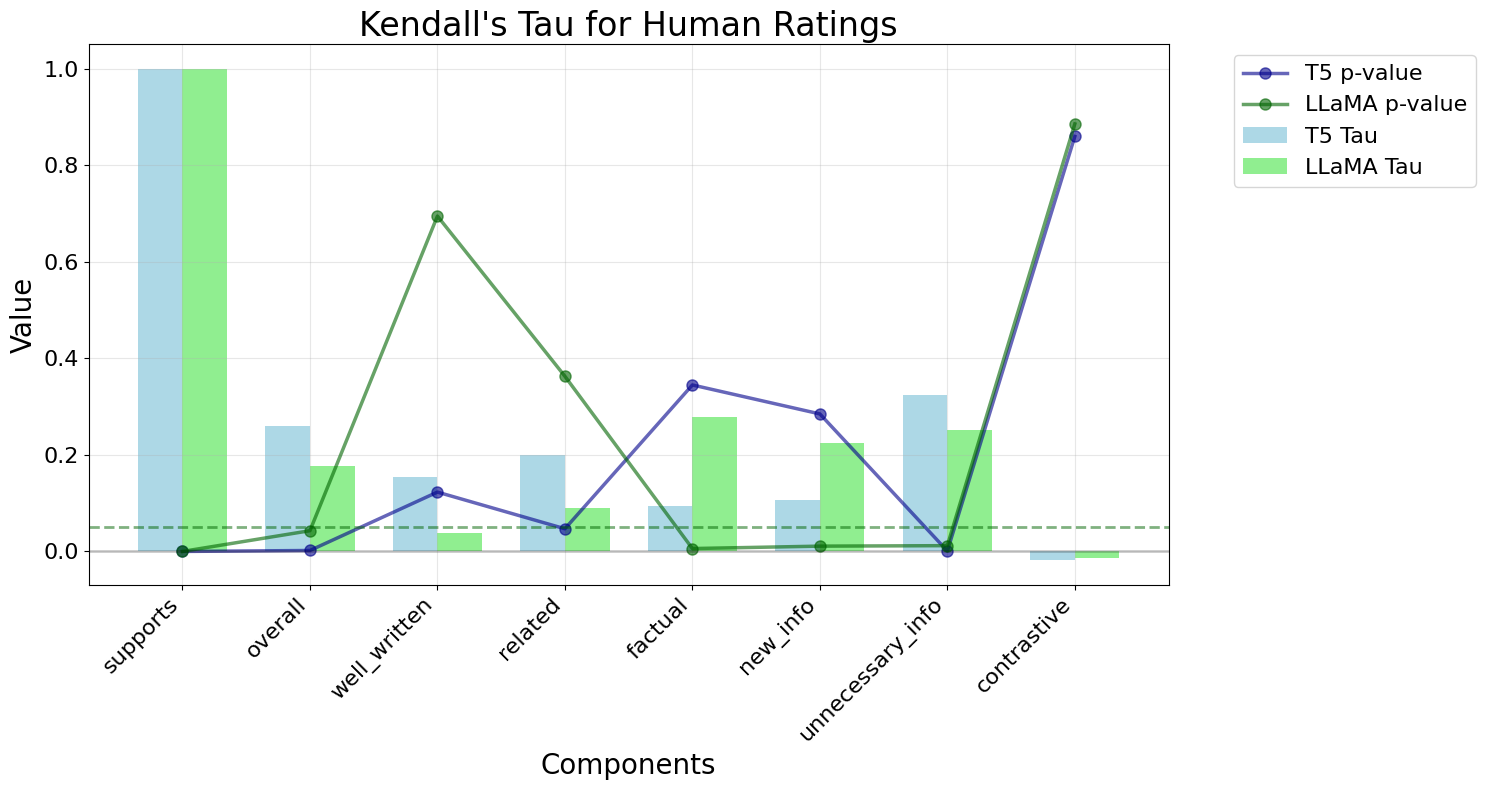


Statistically significant correlations (p < 0.05):

T5:
supports        - Tau: 1.000 (p: 0.000)
overall         - Tau: 0.259 (p: 0.002)
related         - Tau: 0.200 (p: 0.047)
unnecessary_info - Tau: 0.324 (p: 0.001)

LLaMA:
supports        - Tau: 1.000 (p: 0.000)
overall         - Tau: 0.178 (p: 0.043)
factual         - Tau: 0.278 (p: 0.006)
new_info        - Tau: 0.224 (p: 0.011)
unnecessary_info - Tau: 0.251 (p: 0.012)


In [7]:
# Create dataframe with results
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']
t5_tau = [1.000, 0.259, 0.155, 0.200, 0.095, 0.106, 0.324, -0.018]
t5_p = [0.000, 0.002, 0.123, 0.047, 0.345, 0.285, 0.001, 0.860]
llama_tau = [1.000, 0.178, 0.039, 0.091, 0.278, 0.224, 0.251, -0.014]
llama_p = [0.000, 0.043, 0.695, 0.363, 0.006, 0.011, 0.012, 0.886]

# Create figure
plt.figure(figsize=(15, 8))

# Set up the bar positions
x = np.arange(len(components))
width = 0.35  # wider bars since we only have two sets now

# Plot bars for Kendall's Tau
plt.bar(x - width/2, t5_tau, width, label='T5 Tau', color='lightblue')
plt.bar(x + width/2, llama_tau, width, label='LLaMA Tau', color='lightgreen')

# Plot lines for p-values with thicker lines
plt.plot(x, t5_p, 'o-', label='T5 p-value', color='darkblue', alpha=0.6, linewidth=2.5, markersize=8)
plt.plot(x, llama_p, 'o-', label='LLaMA p-value', color='darkgreen', alpha=0.6, linewidth=2.5, markersize=8)

# Customize the plot
plt.ylabel('Value', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.title("Kendall's Tau for Human Ratings", fontsize=24)
plt.xticks(x, components, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Increase legend size and move it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

plt.grid(True, alpha=0.3)

# Add horizontal lines with increased thickness
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2, linewidth=2)
plt.axhline(y=0.05, color='darkgreen', linestyle='--', alpha=0.5, label='p=0.05 threshold', linewidth=2)

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

# Save the plot with extra space for legend
plt.savefig('Human_Kendalls_Tau.png', dpi=300, bbox_inches='tight')
plt.show()

# Print significant correlations (p < 0.05)
print("\nStatistically significant correlations (p < 0.05):")
print("\nT5:")
for comp, tau, p in zip(components, t5_tau, t5_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

print("\nLLaMA:")
for comp, tau, p in zip(components, llama_tau, llama_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

Generated Ratings Correlation with Human Ratings


In [10]:
def parse_ratings(rating_str):
    # Convert string representation of ratings to dictionary
    rating_dict = {}
    for line in rating_str.strip().split('\n'):
        if ':' in line:
            key, value = line.split(':')
            try:
                rating_dict[key.strip()] = float(value.strip())
            except ValueError:
                continue
    return rating_dict

# Read the CSV file
df = pd.read_csv('Last100TwoHumans.csv', sep=';')

# Calculate overall Kendall's Tau for T5 Generated vs Human Ratings
t5_generated = df['T5 Ratings']
t5_human1 = df['T5 Human Ratings 1']
t5_human2 = df['T5 Human Ratings 2']

tau_t5_h1, p_value_t5_h1 = stats.kendalltau(t5_generated, t5_human1)
tau_t5_h2, p_value_t5_h2 = stats.kendalltau(t5_generated, t5_human2)

print(f"Number of rows analyzed: {len(df)}")


# Parse ratings
t5_generated = df['T5 Ratings'].apply(parse_ratings)
t5_human1 = df['T5 Human Ratings 1'].apply(parse_ratings)
t5_human2 = df['T5 Human Ratings 2'].apply(parse_ratings)
llama_generated = df['LLaMA Ratings'].apply(parse_ratings)
llama_human1 = df['LLaMA Human Ratings 1'].apply(parse_ratings)
llama_human2 = df['LLaMA Human Ratings 2'].apply(parse_ratings)

# Components to compare
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

print("\nT5 Generated vs Human Ratings:")
print("\nT5 Generated vs Human 1:")
for component in components:
    # Get component ratings where both exist
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(t5_generated, t5_human1) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h1_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h1_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

print("\nT5 Generated vs Human 2:")
for component in components:
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(t5_generated, t5_human2) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h2_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h2_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

print("\nLLaMA Generated vs Human Ratings:")
print("\nLLaMA Generated vs Human 1:")
for component in components:
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(llama_generated, llama_human1) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h1_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h1_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

print("\nLLaMA Generated vs Human 2:")
for component in components:
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(llama_generated, llama_human2) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h2_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h2_ratings)
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

Number of rows analyzed: 100

T5 Generated vs Human Ratings:

T5 Generated vs Human 1:
supports        - Kendall's Tau: -0.042 (p-value: 0.637) (n=100)
overall         - Kendall's Tau: 0.142 (p-value: 0.107) (n=100)
well_written    - Kendall's Tau: -0.227 (p-value: 0.024) (n=100)
related         - Kendall's Tau: 0.179 (p-value: 0.076) (n=100)
factual         - Kendall's Tau: -0.053 (p-value: 0.595) (n=100)
new_info        - Kendall's Tau: -0.032 (p-value: 0.747) (n=100)
unnecessary_info - Kendall's Tau: 0.187 (p-value: 0.063) (n=100)
contrastive     - Kendall's Tau: 0.014 (p-value: 0.886) (n=100)

T5 Generated vs Human 2:
supports        - Kendall's Tau: -0.042 (p-value: 0.637) (n=100)
overall         - Kendall's Tau: 0.099 (p-value: 0.267) (n=100)
well_written    - Kendall's Tau: -0.108 (p-value: 0.284) (n=100)
related         - Kendall's Tau: -0.003 (p-value: 0.974) (n=100)
factual         - Kendall's Tau: 0.067 (p-value: 0.503) (n=100)
new_info        - Kendall's Tau: -0.158 (p-valu

Plotting Generated Ratings Correlation with Human Ratings 1


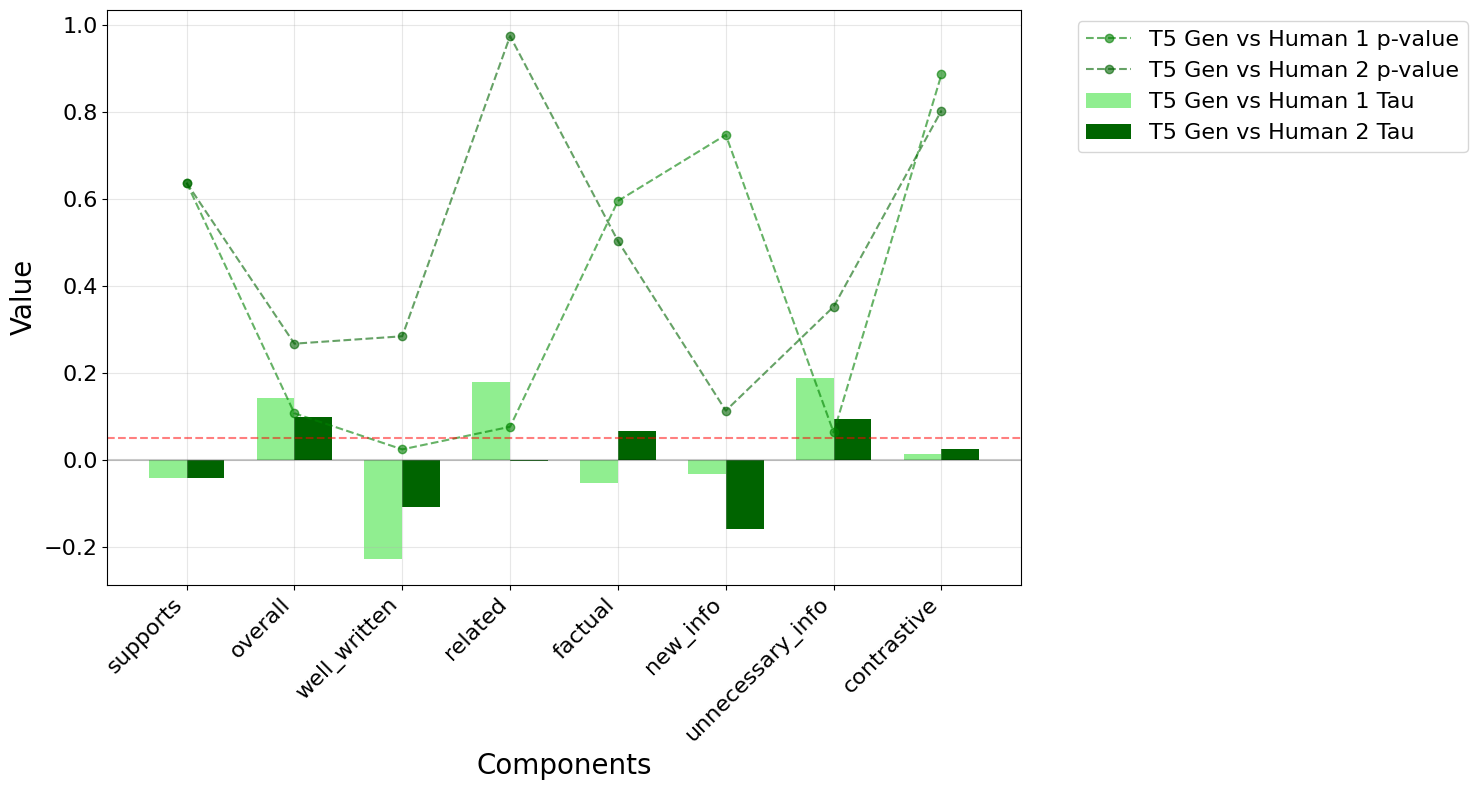


Statistically significant correlations (p < 0.05):

T5 Generated vs Human 1:
well_written    - Tau: -0.227 (p: 0.024)

T5 Generated vs Human 2:


In [12]:
# Create dataframe with results
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

# T5 Generated vs Human correlations
t5_gen_h1_tau = [-0.042, 0.142, -0.227, 0.179, -0.053, -0.032, 0.187, 0.014]
t5_gen_h1_p = [0.637, 0.107, 0.024, 0.076, 0.595, 0.747, 0.063, 0.886]
t5_gen_h2_tau = [-0.042, 0.099, -0.108, -0.003, 0.067, -0.158, 0.093, 0.025]
t5_gen_h2_p = [0.637, 0.267, 0.284, 0.974, 0.503, 0.113, 0.352, 0.803]

# Create figure
plt.figure(figsize=(15, 8))

# Set up the bar positions
x = np.arange(len(components))
width = 0.35  # wider bars since we only have two sets now

# Plot bars for Kendall's Tau
plt.bar(x - width/2, t5_gen_h1_tau, width, label='T5 Gen vs Human 1 Tau', color='lightgreen')
plt.bar(x + width/2, t5_gen_h2_tau, width, label='T5 Gen vs Human 2 Tau', color='darkgreen')

# Plot lines for p-values
plt.plot(x, t5_gen_h1_p, 'o--', label='T5 Gen vs Human 1 p-value', color='green', alpha=0.6)
plt.plot(x, t5_gen_h2_p, 'o--', label='T5 Gen vs Human 2 p-value', color='darkgreen', alpha=0.6)

# Customize the plot
plt.ylabel('Value', fontsize=20)
plt.xlabel('Components', fontsize=20)

plt.xticks(x, components, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Increase legend size and move it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

plt.grid(True, alpha=0.3)

# Add horizontal lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='p=0.05 threshold')

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

# Save the plot with extra space for legend
plt.savefig('T5_Generated_vs_Human_Kendalls_Tau.png', dpi=300, bbox_inches='tight')
plt.show()

# Print significant correlations (p < 0.05)
print("\nStatistically significant correlations (p < 0.05):")
print("\nT5 Generated vs Human 1:")
for comp, tau, p in zip(components, t5_gen_h1_tau, t5_gen_h1_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

print("\nT5 Generated vs Human 2:")
for comp, tau, p in zip(components, t5_gen_h2_tau, t5_gen_h2_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

Plotting Generated Ratings Correlation with Human Ratings 2


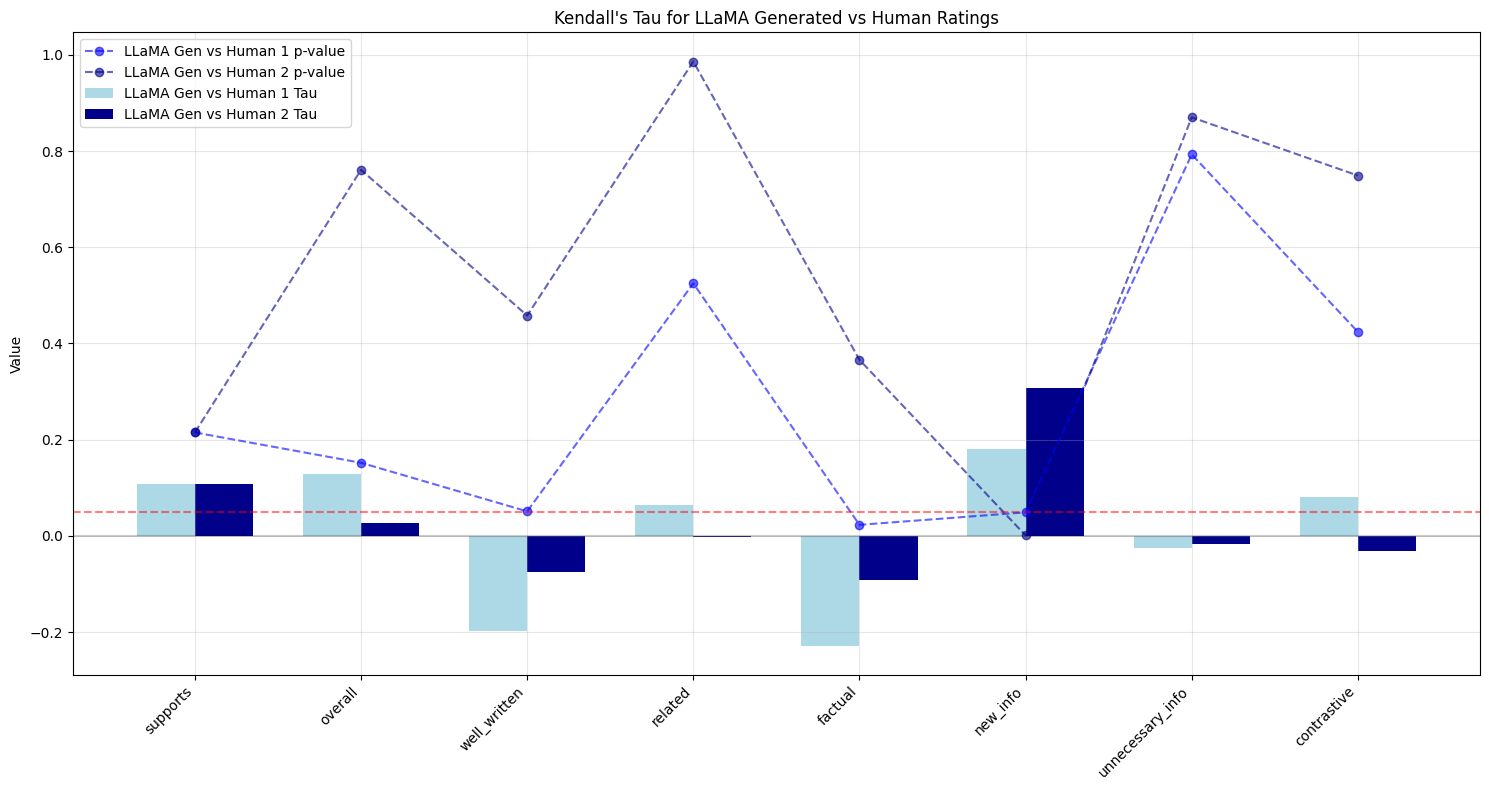


Statistically significant correlations (p < 0.05):

LLaMA Generated vs Human 1:
factual         - Tau: -0.228 (p: 0.023)
new_info        - Tau: 0.181 (p: 0.049)

LLaMA Generated vs Human 2:
new_info        - Tau: 0.308 (p: 0.001)


In [13]:
# Create dataframe with results
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

# LLaMA Generated vs Human correlations
llama_gen_h1_tau = [0.108, 0.129, -0.197, 0.064, -0.228, 0.181, -0.026, 0.080]
llama_gen_h1_p = [0.215, 0.152, 0.051, 0.525, 0.023, 0.049, 0.793, 0.424]
llama_gen_h2_tau = [0.108, 0.027, -0.075, -0.002, -0.091, 0.308, -0.016, -0.032]
llama_gen_h2_p = [0.215, 0.761, 0.458, 0.986, 0.366, 0.001, 0.870, 0.749]

# Create figure
plt.figure(figsize=(15, 8))

# Set up the bar positions
x = np.arange(len(components))
width = 0.35  # wider bars since we only have two sets now

# Plot bars for Kendall's Tau
plt.bar(x - width/2, llama_gen_h1_tau, width, label='LLaMA Gen vs Human 1 Tau', color='lightblue')
plt.bar(x + width/2, llama_gen_h2_tau, width, label='LLaMA Gen vs Human 2 Tau', color='darkblue')

# Plot lines for p-values
plt.plot(x, llama_gen_h1_p, 'o--', label='LLaMA Gen vs Human 1 p-value', color='blue', alpha=0.6)
plt.plot(x, llama_gen_h2_p, 'o--', label='LLaMA Gen vs Human 2 p-value', color='darkblue', alpha=0.6)

# Customize the plot
plt.ylabel('Value')
plt.title("Kendall's Tau for LLaMA Generated vs Human Ratings")
plt.xticks(x, components, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add horizontal lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='p=0.05 threshold')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('LLaMA_Generated_vs_Human_Kendalls_Tau.png', dpi=300, bbox_inches='tight')
plt.show()

# Print significant correlations (p < 0.05)
print("\nStatistically significant correlations (p < 0.05):")
print("\nLLaMA Generated vs Human 1:")
for comp, tau, p in zip(components, llama_gen_h1_tau, llama_gen_h1_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

print("\nLLaMA Generated vs Human 2:")
for comp, tau, p in zip(components, llama_gen_h2_tau, llama_gen_h2_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

Human 1 vs Generated Ratings



In [16]:
def parse_ratings(rating_str):
    # Convert string representation of ratings to dictionary
    rating_dict = {}
    for line in rating_str.strip().split('\n'):
        if ':' in line:
            key, value = line.split(':')
            try:
                rating_dict[key.strip()] = float(value.strip())
            except ValueError:
                continue
    return rating_dict

# Read the CSV file
df = pd.read_csv('Last100TwoHumans.csv', sep=';')

# Calculate overall Kendall's Tau for Generated vs Human 1 Ratings
t5_generated = df['T5 Ratings']
llama_generated = df['LLaMA Ratings']
human1 = df['T5 Human Ratings 1']  # Using T5 Human 1 as reference

tau_t5_h1, p_value_t5_h1 = stats.kendalltau(t5_generated, human1)
tau_llama_h1, p_value_llama_h1 = stats.kendalltau(llama_generated, human1)

print(f"Number of rows analyzed: {len(df)}")

# Parse ratings
t5_generated = df['T5 Ratings'].apply(parse_ratings)
llama_generated = df['LLaMA Ratings'].apply(parse_ratings)
human1 = df['T5 Human Ratings 1'].apply(parse_ratings)

# Components to compare
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

print("\nComponent-wise correlations:")
print("\nT5 Generated vs Human 1:")
t5_results = []
for component in components:
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(t5_generated, human1) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h1_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h1_ratings)
        t5_results.append((tau, p_value))
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

print("\nLLaMA Generated vs Human 1:")
llama_results = []
for component in components:
    pairs = [(r1[component], r2[component]) 
             for r1, r2 in zip(llama_generated, human1) 
             if r1 and r2 and component in r1 and component in r2]
    
    if pairs:
        gen_ratings, h1_ratings = zip(*pairs)
        tau, p_value = stats.kendalltau(gen_ratings, h1_ratings)
        llama_results.append((tau, p_value))
        print(f"{component:15} - Kendall's Tau: {tau:.3f} (p-value: {p_value:.3f}) (n={len(pairs)})")

print("\nStatistically significant correlations (p < 0.05):")
print("\nT5 Generated vs Human 1:")
for comp, (tau, p) in zip(components, t5_results):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

print("\nLLaMA Generated vs Human 1:")
for comp, (tau, p) in zip(components, llama_results):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

Number of rows analyzed: 100

Component-wise correlations:

T5 Generated vs Human 1:
supports        - Kendall's Tau: -0.042 (p-value: 0.637) (n=100)
overall         - Kendall's Tau: 0.142 (p-value: 0.107) (n=100)
well_written    - Kendall's Tau: -0.227 (p-value: 0.024) (n=100)
related         - Kendall's Tau: 0.179 (p-value: 0.076) (n=100)
factual         - Kendall's Tau: -0.053 (p-value: 0.595) (n=100)
new_info        - Kendall's Tau: -0.032 (p-value: 0.747) (n=100)
unnecessary_info - Kendall's Tau: 0.187 (p-value: 0.063) (n=100)
contrastive     - Kendall's Tau: 0.014 (p-value: 0.886) (n=100)

LLaMA Generated vs Human 1:
supports        - Kendall's Tau: 0.108 (p-value: 0.215) (n=100)
overall         - Kendall's Tau: -0.013 (p-value: 0.883) (n=100)
well_written    - Kendall's Tau: 0.057 (p-value: 0.569) (n=100)
related         - Kendall's Tau: -0.036 (p-value: 0.720) (n=100)
factual         - Kendall's Tau: 0.095 (p-value: 0.346) (n=100)
new_info        - Kendall's Tau: -0.029 (p-valu

Plotting Human 1 vs Generated Ratings


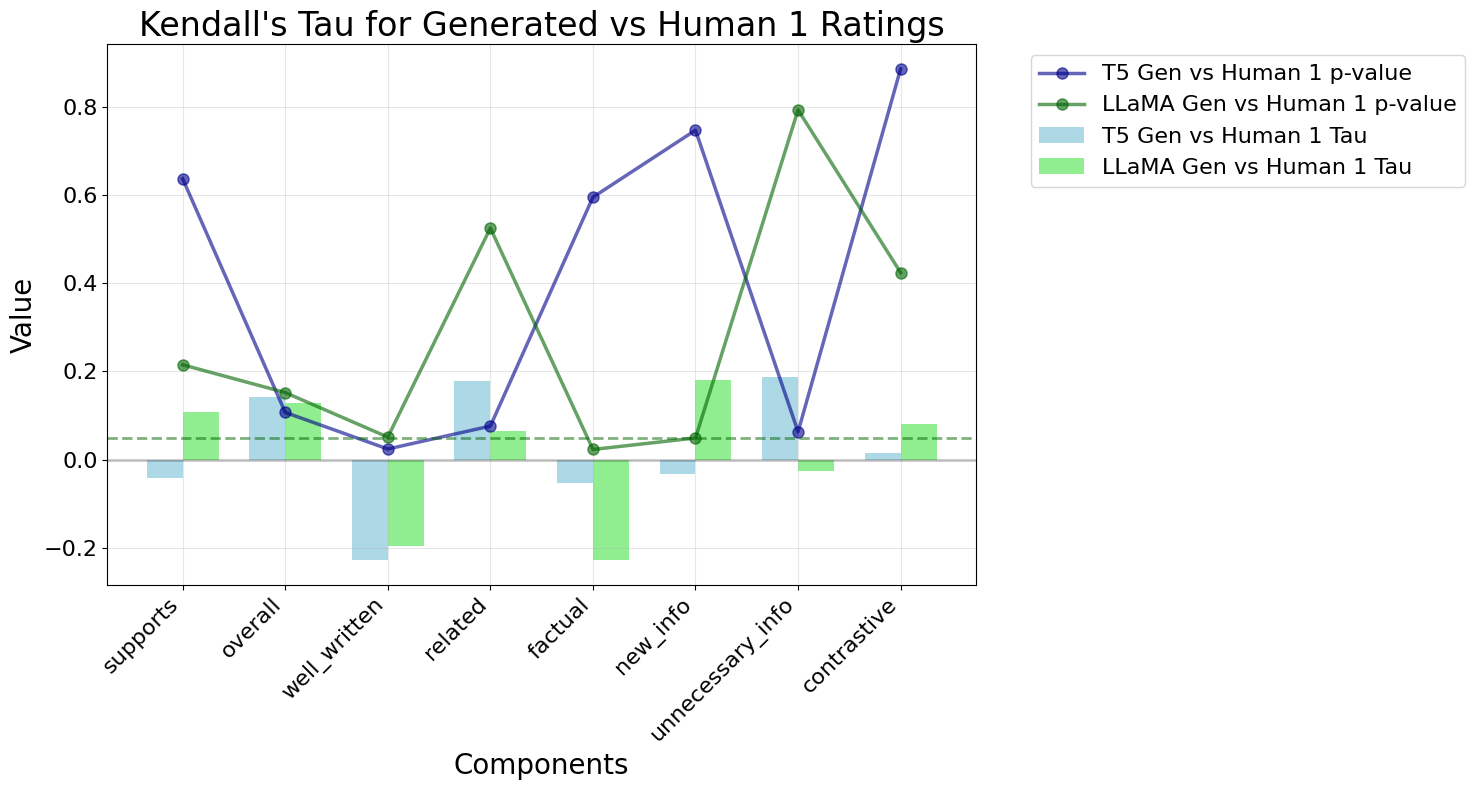


Statistically significant correlations (p < 0.05):

T5 Generated vs Human 1:
well_written    - Tau: -0.227 (p: 0.024)

LLaMA Generated vs Human 1:
factual         - Tau: -0.228 (p: 0.023)
new_info        - Tau: 0.181 (p: 0.049)


In [20]:
# Create dataframe with results
components = ['supports', 'overall', 'well_written', 'related', 'factual', 'new_info', 'unnecessary_info', 'contrastive']

# Generated vs Human 1 correlations
t5_gen_h1_tau = [-0.042, 0.142, -0.227, 0.179, -0.053, -0.032, 0.187, 0.014]
t5_gen_h1_p = [0.637, 0.107, 0.024, 0.076, 0.595, 0.747, 0.063, 0.886]
llama_gen_h1_tau = [0.108, 0.129, -0.197, 0.064, -0.228, 0.181, -0.026, 0.080]
llama_gen_h1_p = [0.215, 0.152, 0.051, 0.525, 0.023, 0.049, 0.793, 0.424]

# Create figure
plt.figure(figsize=(15, 8))

# Set up the bar positions
x = np.arange(len(components))
width = 0.35  # wider bars since we only have two sets now

# Plot bars for Kendall's Tau
plt.bar(x - width/2, t5_gen_h1_tau, width, label='T5 Gen vs Human 1 Tau', color='lightblue')
plt.bar(x + width/2, llama_gen_h1_tau, width, label='LLaMA Gen vs Human 1 Tau', color='lightgreen')

# Plot lines for p-values with thicker lines
plt.plot(x, t5_gen_h1_p, 'o-', label='T5 Gen vs Human 1 p-value', color='darkblue', alpha=0.6, linewidth=2.5, markersize=8)
plt.plot(x, llama_gen_h1_p, 'o-', label='LLaMA Gen vs Human 1 p-value', color='darkgreen', alpha=0.6, linewidth=2.5, markersize=8)

# Customize the plot
plt.ylabel('Value', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.title("Kendall's Tau for Generated vs Human 1 Ratings", fontsize=24)
plt.xticks(x, components, rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Increase legend size and move it outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

plt.grid(True, alpha=0.3)

# Add horizontal lines with increased thickness
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2, linewidth=2)
plt.axhline(y=0.05, color='darkgreen', linestyle='--', alpha=0.5, label='p=0.05 threshold', linewidth=2)

# Adjust layout to prevent legend from being cut off
plt.tight_layout()

# Save the plot with extra space for legend
plt.savefig('Generated_vs_Human1_Kendalls_Tau.png', dpi=300, bbox_inches='tight')
plt.show()

# Print significant correlations (p < 0.05)
print("\nStatistically significant correlations (p < 0.05):")
print("\nT5 Generated vs Human 1:")
for comp, tau, p in zip(components, t5_gen_h1_tau, t5_gen_h1_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")

print("\nLLaMA Generated vs Human 1:")
for comp, tau, p in zip(components, llama_gen_h1_tau, llama_gen_h1_p):
    if p < 0.05:
        print(f"{comp:15} - Tau: {tau:.3f} (p: {p:.3f})")